<a href="https://colab.research.google.com/github/Francisco4643/bowl-detection-yolov5/blob/main/MugDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mug Detector with YOLOv5

## Setup

In [1]:
#clone YOLOv5 and
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15966, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 15966 (delta 43), reused 50 (delta 24), pack-reused 15880
Receiving objects: 100% (15966/15966), 14.64 MiB | 19.12 MiB/s, done.
Resolving deltas: 100% (10942/10942), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.3/616.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.3 MB/s eta

In [2]:
from roboflow import Roboflow
# rf = Roboflow(model_format="yolov5", notebook="ultralytics")

In [3]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

## Get dataset from Roboflow

In [4]:
rf = Roboflow(api_key="kipkGN1h0OMoOMce4q48")
project = rf.workspace("unitbv-tvias").project("bowl-detection-cxqr7")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/-bowl-detection-1 in yolov5pytorch:: 100%|██████████| 117/117 [00:00<00:00, 8698.33it/s]


## Train The Yolo Model








In [5]:
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/-bowl-detection-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-217-g8c45e51 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, h

## Show Training Results

In [6]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

## Prediction

In [7]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source {dataset.location}/valid/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/-bowl-detection-1/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-217-g8c45e51 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/3 /content/datasets/-bowl-detection-1/valid/images/IMG-20230912-WA0022_jpg.rf.7f9502d3ef64a126fe382d0d51cd4f1c.jpg: 416x416 1 bowl, 7.4ms
image 2/3 /content/datasets/-bowl-detection-1/valid/images/IMG-20230912-WA0027_jpg.rf.20c88cbb00258bad8ef1be92fe588f90.jpg: 416x416 1 bowl, 7.5ms
image 3/3 

## Display Inference Images

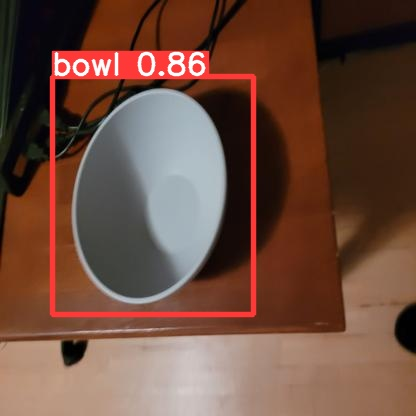

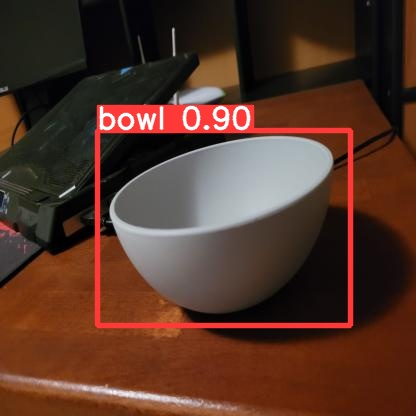

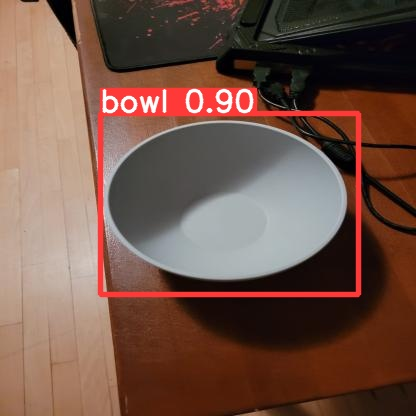

In [8]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
# Choose the correct exp folder - see prev output block
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    i += 1

    if i < 8:
      display(Image(filename=imageName))
      print("\n")

## Save Model

In [9]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>